In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from stockMarket.core import get_tickers_from_index

tickers = get_tickers_from_index('sp500')

In [25]:
from stockMarket.technicals.trade.enums import TradeStatus
from stockMarket.technicals.trade.tradeSettings import TradeSettings

TradeStatus.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_status_description.txt")

TradeSettings.write_description_to_file("/home/jag/rclone/drive/stockMarket/Trading/strategy_testing/trade_settings_description.txt")

/home/jag/Trading/stockMarket/stockMarket/technicals/strategy.py:328: RuntimeWarning: invalid value encountered in divide
  PL_ratio = np.array(PL_win_values) / \


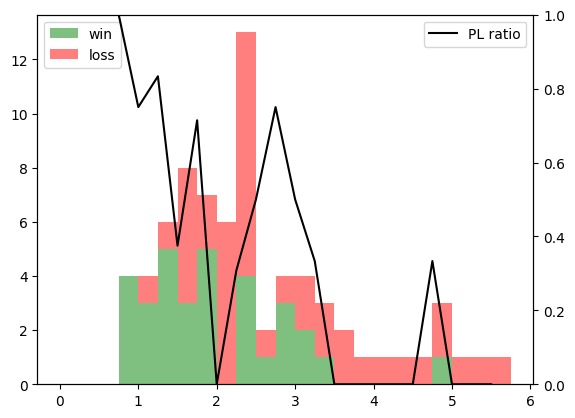

In [18]:
from stockMarket.technicals.strategy import Strategy
from stockMarket.technicals.trade.trade import TradeSettings
from stockMarket.technicals.strategyObjects import EMAStrategy, FIBStrategy, RSIStrategy

settings = TradeSettings(
    loss_limit=None,
    min_PL=0.5,
    max_PL=None,
    min_TP_B_TC_B_to_LOW_RATIO=None,
    min_ratio_high_to_ref_candle=1.03,
    max_drawdown_ratio_after_new_high=0.95,
)

strategy = Strategy(
    # [FIBStrategy([0.3, 0.7])],
    [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7])],
    # [EMAStrategy([8, 20, 50]), FIBStrategy([0.3, 0.7]), RSIStrategy(14, 60, 70)],
    start_date="06.03.2023",
    end_date="05.03.2024",
    candle_period="weekly",
    base_path="/home/jag/rclone/drive/stockMarket/Trading/strategy_testing",
    storing_behavior="numerical",
    trade_settings=settings,
    use_earnings_dates=False,
    finalize_commands=["~/bin/rclone/sync_stockMarket.sh push"],
)

strategy.screen(tickers)

strategy.plot_PL_histogramm()